# DATA ANALYSIS 

# importing labraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing & inspecting data

In [2]:
startup = pd.read_excel("startup-expansion.xlsx")
startup

Store ID             City       State Sales Region New Expansion  \
0           1           Peoria     Arizona     Region 2           Old   
1           2          Midland       Texas     Region 2           Old   
2           3          Spokane  Washington     Region 2           Old   
3           4           Denton       Texas     Region 2           Old   
4           5    Overland Park      Kansas     Region 2           Old   
..        ...              ...         ...          ...           ...   
145       146         Paterson  New Jersey     Region 1           New   
146       147      Brownsville       Texas     Region 2           New   
147       148         Rockford    Illinois     Region 1           New   
148       149  College Station       Texas     Region 2           New   
149       150    Thousand Oaks  California     Region 2           New   

     Marketing Spend  Revenue  
0               2601    48610  
1               2727    45689  
2               2768    49554  
3               2759    38284  
4               2869    59887  
..               ...      ...  
145             2251    34603  
146             3675    63148  
147             2648    43377  
148             2994    22457  
149             2431    40141  

[150 rows x 7 columns]

In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [4]:
#exclude storeId because it's meaningless 
startup[['Marketing Spend','Revenue']].describe().round(2)

Marketing Spend   Revenue
count           150.00    150.00
mean           2893.15  39301.43
std             367.86  15465.75
min            1811.00  15562.00
25%            2662.25  21113.50
50%            2898.00  42993.00
75%            3111.50  51145.50
max            3984.00  68828.00

# prepocessing data


In [5]:
startup['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [6]:
startup['City'].nunique()

149

In [7]:
#Verification of duplicated rows
startup[startup['City'].duplicated()]

Store ID       City      State Sales Region New Expansion  \
124       125  Rochester  Minnesota     Region 1           Old   

     Marketing Spend  Revenue  
124             2854    18099

In [8]:
startup['City'].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

In [9]:
startup['State'].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: State, dtype: int64

In [10]:
startup['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [11]:
startup['State'].nunique()

35

In [12]:
startup['Sales Region'].nunique()

2

In [13]:
startup['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [14]:
startup['Sales Region'].value_counts()

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

In [15]:
startup['New Expansion'].nunique()

2

In [16]:
startup['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [17]:
startup['New Expansion'].value_counts()

Old    140
New     10
Name: New Expansion, dtype: int64

In [18]:
startup.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [19]:
startup.duplicated().sum()

0

# exploring & analysing data

In [20]:
startup.sample(10)

Store ID              City           State Sales Region New Expansion  \
76         77  West Valley City            Utah     Region 2           Old   
107       108      Fayetteville  North Carolina     Region 1           Old   
142       143            Joliet        Illinois     Region 1           New   
144       145          Glendale      California     Region 2           New   
139       140        Providence    Rhode Island     Region 1           Old   
15         16          Temecula      California     Region 2           Old   
35         36          Pearland           Texas     Region 2           Old   
62         63          Richmond      California     Region 2           Old   
25         26    Port St. Lucie         Florida     Region 1           Old   
132       133        Des Moines            Iowa     Region 1           Old   

     Marketing Spend  Revenue  
76              2555    49609  
107             3020    51229  
142             3279    48315  
144             2363    49376  
139             3191    62337  
15              2795    16690  
35              3127    20057  
62              3924    19448  
25              2420    55790  
132             2995    57432

# Sales Region

<Axes:>

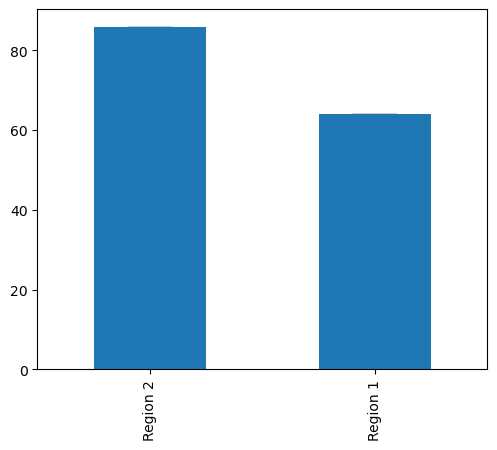

In [21]:
per_1=startup['Sales Region'].value_counts()
x=startup['Sales Region'].unique()
fig=plt.figure(figsize=(5,4))
axe1=fig.add_axes([1,1,0.9,0.9])
axe1.bar(x,per_1,color='purple',width=0.2,label='Sales Region',edgecolor='k')
#or using:
startup['Sales Region'].value_counts().plot.bar()

In [22]:
#What is the average revenue per store in each sales region?
startup.groupby('Sales Region').Revenue.agg(['sum','count','mean'])

sum  count          mean
Sales Region                              
Region 1      2596301     64  40567.203125
Region 2      3298914     86  38359.465116

Text(0, 0.5, 'Revenue')

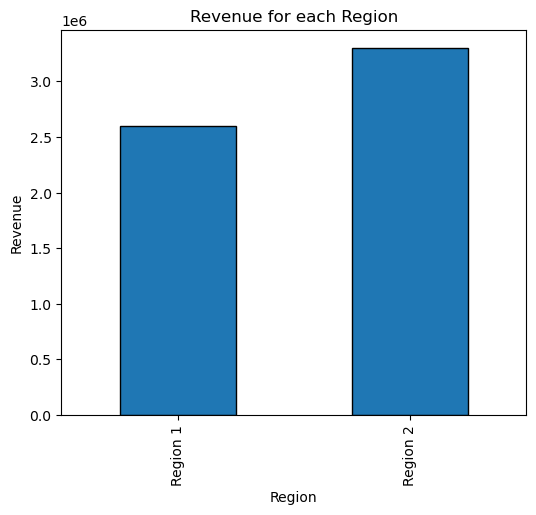

In [23]:
#Is there any relationship between the sales region and the marketing spend or revenue?
startup.groupby('Sales Region')['Revenue'].sum().plot(kind ='bar' ,  figsize = (6,5),label='revenue',edgecolor='k')
plt.title("Revenue for each Region")
plt.xlabel("Region")
plt.ylabel("Revenue")

Text(0, 0.5, 'Marketing Spend')

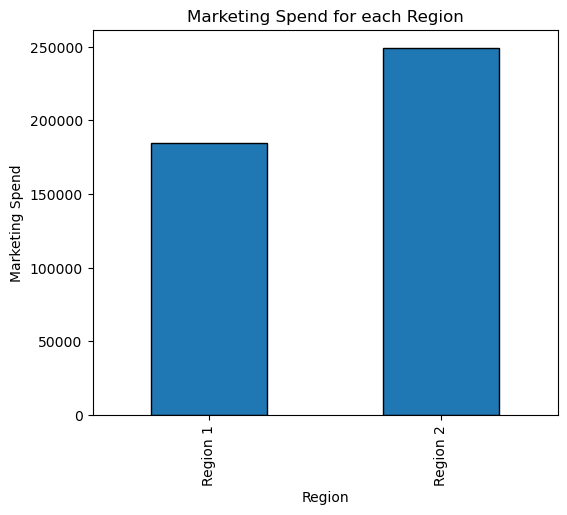

In [24]:
startup.groupby('Sales Region')['Marketing Spend'].sum().plot(kind ='bar' ,  figsize = (6,5),label='Marketing Spend',edgecolor='k')
plt.title("Marketing Spend for each Region")
plt.xlabel("Region")
plt.ylabel("Marketing Spend")

# store Id

In [25]:
#Which stores have the highest revenue, and which have the lowest

In [26]:
c=startup[startup['Revenue']==startup['Revenue'].max()]
c

Store ID         City     State Sales Region New Expansion  \
63        64  Little Rock  Arkansas     Region 2           Old   

    Marketing Spend  Revenue  
63             2440    68828

In [27]:
c=startup[startup['Revenue']==startup['Revenue'].min()]
c

Store ID     City       State Sales Region New Expansion  Marketing Spend  \
53        54  Everett  Washington     Region 2           Old             3129   

    Revenue  
53    15562

# the store's location (city/state)

In [28]:
#Are there any patterns in the data based on the store's location (city/state)?
startup['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [29]:
counts=startup.State.value_counts()
counts.nlargest(3)

California    40
Texas         17
Florida       12
Name: State, dtype: int64

In [30]:
startup[startup['Revenue']==startup['Revenue'].max()][['City','State','Marketing Spend','Revenue']]

City     State  Marketing Spend  Revenue
63  Little Rock  Arkansas             2440    68828

In [31]:
startup[startup['Revenue']==startup['Revenue'].min()][['City','State','Marketing Spend','Revenue']]

City       State  Marketing Spend  Revenue
53  Everett  Washington             3129    15562

In [32]:
#high revenue than average
lessmark = startup[(startup['Revenue'] > startup['Revenue'].mean())]
#print(startup['Revenue'].mean())
lessmark = lessmark.groupby('State').count().sort_values(by='Revenue', ascending=False).reset_index()[['State', 'City']]
lessmark.head()

State  City
0  California    21
1       Texas    10
2     Florida     8
3  Washington     6
4    Illinois     4

Text(0.5, 0, 'Count')

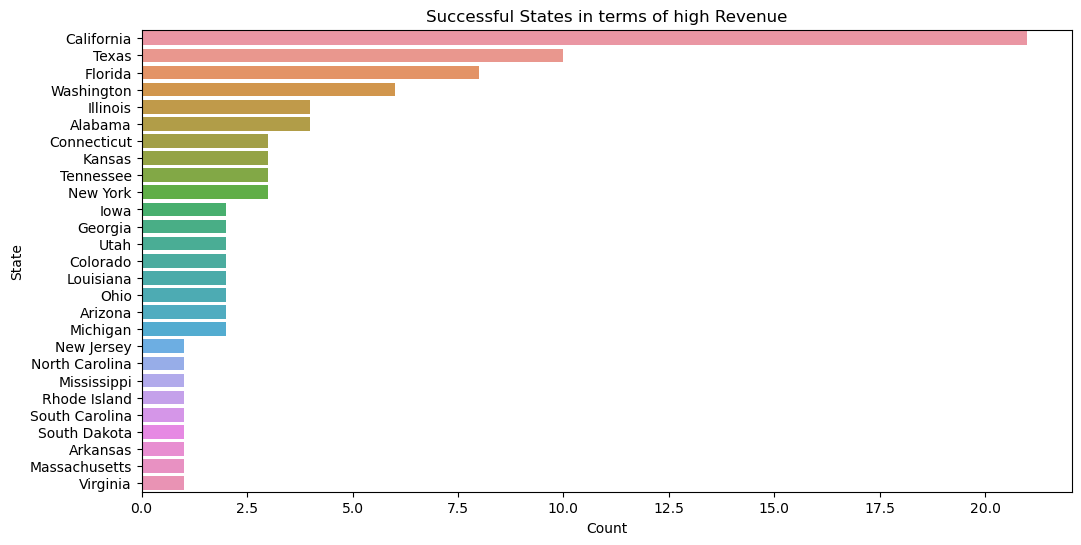

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x='City',y='State',data=lessmark)
plt.title('Successful States in terms of high Revenue' )
plt.xlabel('Count' )

In [34]:
lessmark = startup[(startup['Marketing Spend'] > startup['Marketing Spend'].mean())&(startup['Revenue'] > startup['Revenue'].mean())]
#print(startup['Revenue'].mean())
lessmark = lessmark.groupby('State').count().sort_values(by='Revenue', ascending=False).reset_index()[['State', 'City']]
lessmark.head()

State  City
0   California    13
1        Texas     7
2      Florida     5
3      Alabama     3
4  Connecticut     3

Text(0.5, 0, 'Count')

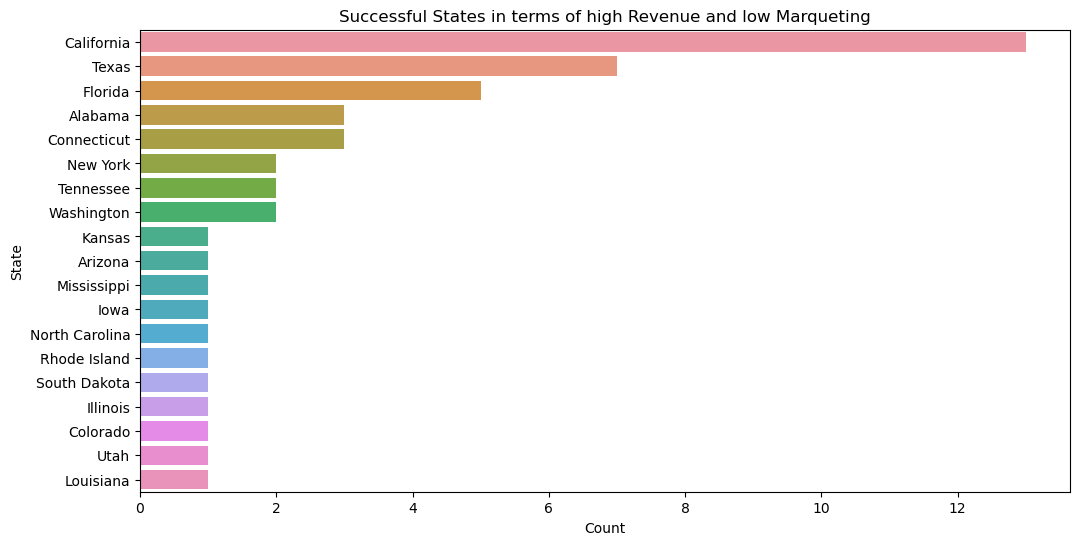

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x='City',y='State',data=lessmark)
plt.title('Successful States in terms of high Revenue and low Marqueting' )
plt.xlabel('Count' )

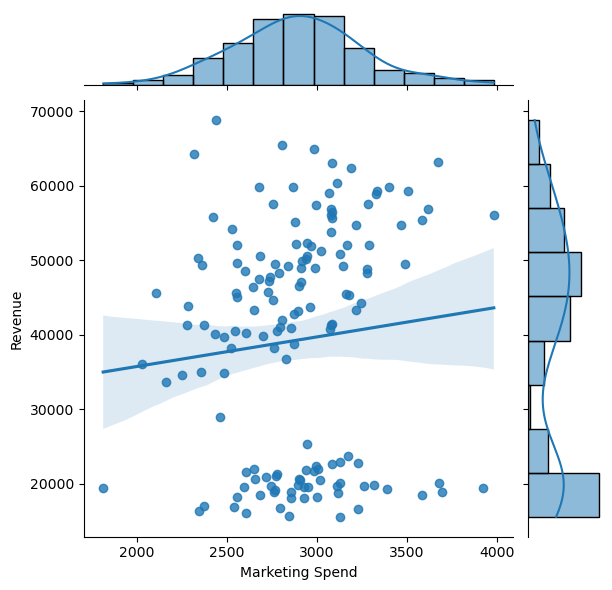

In [36]:
#how much marketing impact revenue
sns.jointplot(x='Marketing Spend',y='Revenue',data=startup,kind='reg')

# New Expansion

In [37]:
#Does the "New Expansion" column have any impact on the revenue or marketing spend?

In [38]:
pd.crosstab(startup['New Expansion'],startup.State)

State          Alabama  Arizona  Arkansas  California  Colorado  Connecticut  \
New Expansion                                                                  
New                  0        1         0           3         0            0   
Old                  4        2         1          37         5            4   

State          Florida  Georgia  Illinois  Indiana  ...  Oregon  Rhode Island  \
New Expansion                                       ...                         
New                  0        0         2        0  ...       0             0   
Old                 12        4         3        1  ...       2             1   

State          South Carolina  South Dakota  Tennessee  Texas  Utah  Virginia  \
New Expansion                                                                   
New                         0             0          1      2     0         0   
Old                         3             1          2     15     3         2   

State          Washington  Wisconsin  
New Expansion                         
New                     0          0  
Old                     7          1  

[2 rows x 35 columns]

In [39]:
s=startup.groupby('New Expansion')['Revenue'].sum()
s.head()

New Expansion
New     458094
Old    5437121
Name: Revenue, dtype: int64

Text(0, 0.5, 'Revenue')

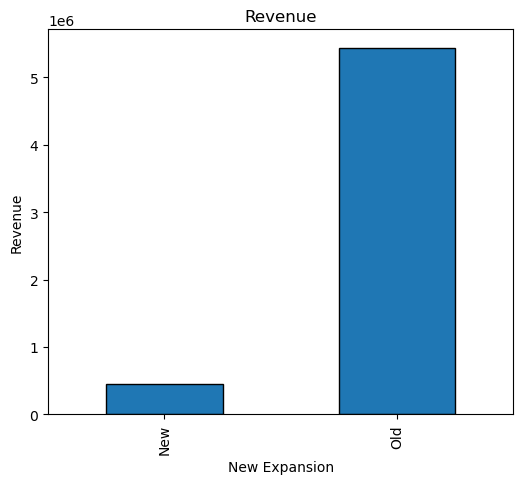

In [40]:
startup.groupby('New Expansion')['Revenue'].sum().plot(kind ='bar' ,  figsize = (6,5),label='Revenue',edgecolor='k')
plt.title("Revenue")
plt.xlabel("New Expansion")
plt.ylabel("Revenue")

In [41]:
d=startup.groupby('New Expansion')['Sales Region'].value_counts().unstack()
d

Sales Region   Region 1  Region 2
New Expansion                    
New                   3         7
Old                  61        79

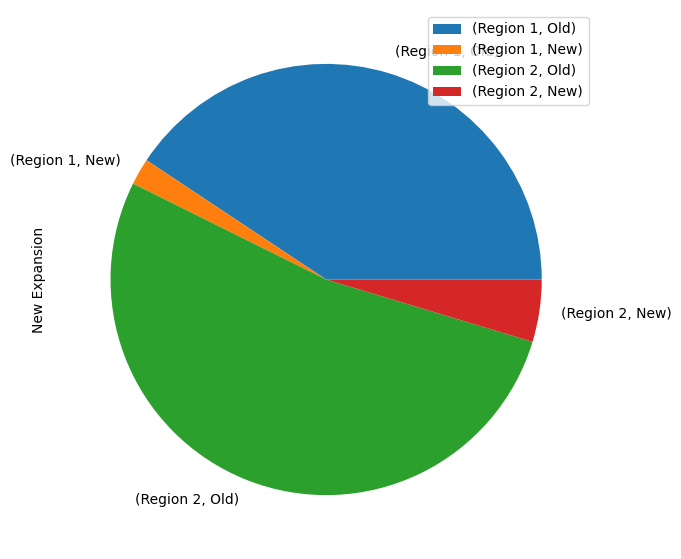

In [42]:
startup.groupby('Sales Region')['New Expansion'].value_counts().plot(kind ='pie',figsize = (12,7))
plt.legend()

In [43]:

startup.groupby('New Expansion').groups
startup.groupby('New Expansion').Revenue.agg(['count','min','max',
                               'mean'])

count    min    max          mean
New Expansion                                   
New               10  22457  63148  45809.400000
Old              140  15562  68828  38836.578571

In [44]:
startup.groupby('New Expansion')['Marketing Spend'].agg(['count','min','max',
                                'mean'])

count   min   max         mean
New Expansion                                
New               10  2251  3675  2908.400000
Old              140  1811  3984  2892.057143

In [45]:
counts = startup[startup['New Expansion'] == 'Old'].groupby('State').sum()
counts['Revenue'].nlargest(10)

State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [46]:
counts = startup[startup['New Expansion'] == 'New'].groupby('State').sum()
counts['Revenue'].nlargest(10)

State
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
New Jersey     34603
Name: Revenue, dtype: int64

# conclusion:
The states that are potential options for expansion are California and Texas. However, it is important to note that the existing old stores generate substantial revenue regardless of whether they are in Region 1 or Region 2.

# profit

In [47]:
#calculate ROI(Return on Investment/#It is a financial metric that measures the profitability of an investment, relative to the amount of money invested. ROI is typically expressed as a percentage, and is calculated by dividing the net profit (or gain) by the cost of the investment.

In [48]:
startup['ROI']=(startup["Revenue"]/startup['Marketing Spend'])*100

In [49]:
round(startup['ROI'],2)

0      1868.90
1      1675.43
2      1790.25
3      1387.60
4      2087.38
        ...   
145    1537.23
146    1718.31
147    1638.10
148     750.07
149    1651.21
Name: ROI, Length: 150, dtype: float64

In [50]:
#profit=revenue-cost
startup['profit']=startup['Revenue']-startup['Marketing Spend']
startup.head(5)

Store ID           City       State Sales Region New Expansion  \
0         1         Peoria     Arizona     Region 2           Old   
1         2        Midland       Texas     Region 2           Old   
2         3        Spokane  Washington     Region 2           Old   
3         4         Denton       Texas     Region 2           Old   
4         5  Overland Park      Kansas     Region 2           Old   

   Marketing Spend  Revenue          ROI  profit  
0             2601    48610  1868.896578   46009  
1             2727    45689  1675.430876   42962  
2             2768    49554  1790.245665   46786  
3             2759    38284  1387.604204   35525  
4             2869    59887  2087.382363   57018

In [51]:
startup['ROMS']=round((startup['profit']/startup['Marketing Spend'])*100,2)
startup

Store ID             City       State Sales Region New Expansion  \
0           1           Peoria     Arizona     Region 2           Old   
1           2          Midland       Texas     Region 2           Old   
2           3          Spokane  Washington     Region 2           Old   
3           4           Denton       Texas     Region 2           Old   
4           5    Overland Park      Kansas     Region 2           Old   
..        ...              ...         ...          ...           ...   
145       146         Paterson  New Jersey     Region 1           New   
146       147      Brownsville       Texas     Region 2           New   
147       148         Rockford    Illinois     Region 1           New   
148       149  College Station       Texas     Region 2           New   
149       150    Thousand Oaks  California     Region 2           New   

     Marketing Spend  Revenue          ROI  profit     ROMS  
0               2601    48610  1868.896578   46009  1768.90  
1               2727    45689  1675.430876   42962  1575.43  
2               2768    49554  1790.245665   46786  1690.25  
3               2759    38284  1387.604204   35525  1287.60  
4               2869    59887  2087.382363   57018  1987.38  
..               ...      ...          ...     ...      ...  
145             2251    34603  1537.227899   32352  1437.23  
146             3675    63148  1718.312925   59473  1618.31  
147             2648    43377  1638.104230   40729  1538.10  
148             2994    22457   750.066800   19463   650.07  
149             2431    40141  1651.213492   37710  1551.21  

[150 rows x 10 columns]

In [52]:
startup['%ROMS']=startup['ROMS']/100
startup.head(5)

Store ID           City       State Sales Region New Expansion  \
0         1         Peoria     Arizona     Region 2           Old   
1         2        Midland       Texas     Region 2           Old   
2         3        Spokane  Washington     Region 2           Old   
3         4         Denton       Texas     Region 2           Old   
4         5  Overland Park      Kansas     Region 2           Old   

   Marketing Spend  Revenue          ROI  profit     ROMS    %ROMS  
0             2601    48610  1868.896578   46009  1768.90  17.6890  
1             2727    45689  1675.430876   42962  1575.43  15.7543  
2             2768    49554  1790.245665   46786  1690.25  16.9025  
3             2759    38284  1387.604204   35525  1287.60  12.8760  
4             2869    59887  2087.382363   57018  1987.38  19.8738

In [53]:
#load  data modified
startup.to_csv('startupmodified.csv')